In [1]:
import pandas as pd
from collections import defaultdict
import queue 
import time

In [2]:
class ActorNetwork:

    def __init__(self):
        """ Creates an actor network object """
        self.costars = defaultdict(set) # actor(string) to acted with (set<string>)
        self.movies  = defaultdict(set) # actor(string) to movies starred in (set<string>)
        
    def getNumActors(self): return len(self.costars)
    
    def getNumConnections(self):
        """ Find the number of edges in a given actor network """
        numEdges = 0
        for _,v in self.costars.items(): numEdges += len(v)
        return int(numEdges/2)
                
    def loadDataSet(self, pthToFile):
        """ Given file name of a dataset """
        with open(pthToFile, 'r') as file:
            for line in file:
                fullLn = line.strip().split(" ")
                movie, actors = fullLn[0],set(fullLn[1:])
                self.addMovie(movie, actors)
    
    def addMovie(self, movie, actors):
        """ Add a movie (string) and a set<actors> string to the network """
        processed = set()
        yetToProcess = actors
        while yetToProcess: # Is only true when actors is non-empty
            actor = yetToProcess.pop()
            self.costars[actor] = self.costars[actor].union(yetToProcess).union(processed)
            self.movies[actor].add(movie)
            processed.add(actor)

In [3]:
!pwd
#!ls

/Users/friana/GraphAlgo


In [4]:
!cd ../..

In [5]:
!pwd

/Users/friana/GraphAlgo


In [6]:
df = pd.read_csv("data/name.basics.tsv", sep = "\t")

In [7]:
df.columns

Index(['nconst', 'primaryName', 'birthYear', 'deathYear', 'primaryProfession',
       'knownForTitles'],
      dtype='object')

In [8]:
df[["primaryName","knownForTitles"]]

,primaryName,knownForTitles
0,Fred Astaire,"tt0072308,tt0050419,tt0027125,tt0025164"
1,Lauren Bacall,"tt0037382,tt0075213,tt0038355,tt0117057"
2,Brigitte Bardot,"tt0057345,tt0049189,tt0056404,tt0054452"
3,John Belushi,"tt0072562,tt0077975,tt0080455,tt0078723"
4,Ingmar Bergman,"tt0050986,tt0069467,tt0083922,tt0050976"
...,...,...
14768107,Romeo del Rosario,"tt11657662,tt14069590,tt2455546"
14768108,Essias Loberg,\N
14768109,Harikrishnan Rajan,tt8736744
14768110,Aayush Nair,tt8736744


In [9]:
subDf = df[:100]

In [10]:
# movieDict <movieTitle> -> <set<actors>>
movieDict = defaultdict(set)
for row,col in subDf.iterrows():
    actor = col["primaryName"]
    titles = col["knownForTitles"].split(",")
    for title in titles:
        movieDict[title].add(actor)

In [11]:
#movieDict

## Goal: Take Data Frame of Actors to Movies and Create Either a Dictionary of a Data Frame that maps movie titles to actors

In [12]:
from collections import defaultdict
import queue
class ActorNetwork:

    def __init__(self):
        """ Creates an actor network object """
        self.costars = defaultdict(set) # actor(string) to acted with (set<string>)
        self.movies  = defaultdict(set) # actor(string) to movies starred in (set<string>)
        
    def getNumActors(self): return len(self.costars)
    
    def getNumConnections(self):
        """ Find the number of edges in a given actor network """
        numEdges = 0
        for _,v in self.costars.items(): numEdges += len(v)
        return int(numEdges/2)
                
    def loadDataSet(self, pthToFile):
        """ Given file name of a dataset """
        with open(pthToFile, 'r') as file:
            for line in file:
                fullLn = line.strip().split(" ")
                movie, actors = fullLn[0],set(fullLn[1:])
                self.addMovie(movie, actors)
    
    def addMovie(self, movie, actors):
        """ Add a movie (string) and a set<actors> string to the network """
        processed = set()
        yetToProcess = actors
        while yetToProcess: # Is only true when actors is non-empty
            actor = yetToProcess.pop()
            self.costars[actor] = self.costars[actor].union(yetToProcess).union(processed)
            self.movies[actor].add(movie)
            processed.add(actor)
    def visualize_network(self):
        """ Visualize the actor network using NetworkX and Matplotlib """
        G = nx.Graph()
        
        # Add nodes (actors)
        for actor in self.costars:
            G.add_node(actor)
        
        # Add edges (costar relationships)
        for actor, costars in self.costars.items():
            for costar in costars:
                G.add_edge(actor, costar)
        
        # Create a circular layout for visualization
        pos = nx.circular_layout(G)
        
        # Draw the graph
        plt.figure(figsize=(10, 8))
        nx.draw(G, pos, with_labels=True, node_color='lightblue', 
                node_size=500, font_size=8, font_weight='bold', 
                edge_color='gray')
        
        # Add title and display
        plt.title("Actor Network Visualization")
        plt.show()

    
    def BFS(self,actor):
        Q = queue.SimpleQueue()
        Q.put(actor)
        parent={}
        visited = {}
        for act in self.costars:
            visited[act]=False
            parent[act]=None

        
        visited[actor] = True
    
        while(not Q.empty()):
            u = Q.get()
           # print(u)
            for v in self.costars[u]:
               # print(v)
               # print(self.costars[u])
                if(visited[v]==False):
                    parent[v] = u
                  #  print(parent[v])
                    Q.put(v)
                    visited[u]=True
        return parent
        
    def getShortestPath(self,actor1,actor2):
        startT = time.time()
        p = self.BFS(actor1)
        if(actor2 not in p):
            print(actor2 +" is not in the database")
        if(p[actor2]==None):
            print(actor2 + " is not in the same network")
        curract = actor2
        movie = []
        actor = [actor2]
        while(curract!=actor1):
            s= p[curract]
            actor.append(s)
            l = list(self.movies[s].intersection(self.movies[curract]))
            movie.append(l[0])
            curract = s
        endT = time.time()
        print(endT-startT)
        return actor,movie
            
            
        


In [13]:
network = ActorNetwork()
    
    # Example data: adding movies manually (replace with loadDataSet for file input)
network.addMovie("Movie1", {"Actor1", "Actor2"})
network.addMovie("Movie2", {"Actor2", "Actor4"})
network.addMovie("Movie3", {"Actor3", "Actor5"})
    
    # Visualize the network
#network.visualize_network()
network.BFS("Actor1")



{'Actor1': None,
 'Actor2': 'Actor1',
 'Actor4': 'Actor2',
 'Actor5': None,
 'Actor3': None}

In [14]:
network.getShortestPath("Actor4","Actor1")

7.152557373046875e-06


(['Actor1', 'Actor2', 'Actor4'], ['Movie1', 'Movie2'])

In [15]:
ac = ActorNetwork()

In [16]:
for movie,actors in movieDict.items():
    ac.addMovie(movie,movieDict[movie])

In [17]:
ac.getNumActors()

100

In [18]:
def fib(n):
    current = 1
    prev = 1
    counter = 3
    if(n==1 or n==2):
        return 1
    
    while(counter<=n):
       
        prev,current = current,current+prev
        counter +=1
    return current
    
        
        


In [19]:
print(fib(17))

1597


In [20]:
import networkx as nx
import matplotlib.pyplot as plt

/Applications/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


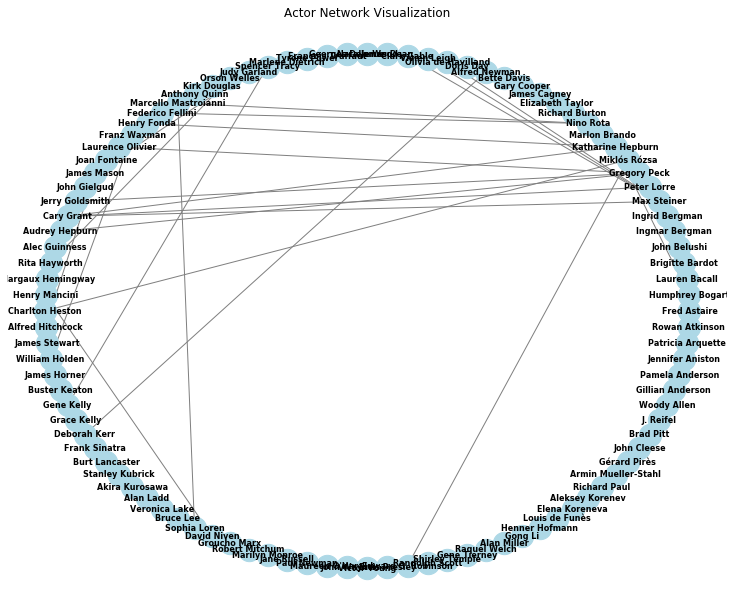

In [21]:
ac.visualize_network()

In [22]:
import queue 

def BFS(s):
    Q = queue.SimpleQueue()
    Q.put(s)
    parent = [None]*100
    visited = [False]*100
    visited[s] = True
    
    while(len(Q)>0):
        u = Q.get()
        for v in adjlist(u):
            if(visited[u]==False):
                pred[v] = u
                Q.put(v)
                visited[u]=True
                

In [23]:
Q=queue.Queue()
Q.put(1)
Q.put(2)
Q.put(3)
print(list(Q.queue))
Q.get()
print(list(Q.queue))

[1, 2, 3]
[2, 3]


In [24]:
Q.get()
print(list(Q.queue))

[3]
